In [2]:
%matplotlib inline
import sys
sys.path.append("..") # Adds the module to path

# deeptrack.aberrations

This notebook introduces the module deeptrack.aberrations.

## 1. What is an aberration?



Aberrations are some alteration of the pupil function of an optical system. They receive the complex pupil function in the fourier space. The method `.get()` may optionally receive the the position of each pixel in polar coordinates through the keyword arguments `rho` and `theta`. 

The feature, or set of features, is passed to the optical system on initilization through the `aberration` keyword.


## 2. Example of an aberration

Below is the implementation of the feature GaussianApodization. It scales the amplitude of the pupil as a function of the distance from the central pixel.

In [3]:
import numpy as np
from deeptrack.aberrations import Aberration

# Implementation of abstract class Aberration
# which decreases the amplitude of the pupil at high frequencies.
class GaussianApodization(Aberration):
    def get(self, pupil, sigma=1, rho=None, **kwargs):
        return pupil * np.exp(-(rho / sigma) ** 2) 

## 3. Aberrations in use

Here we show aberrations in use. We study the point spread function depending on the apodization.

In [36]:
from deeptrack.scatterers import PointParticle
from deeptrack.optics import Fluorescence

particle = PointParticle(
    position=(32, 32),
    position_unit="pixel",
    intensity=1
)

unaberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64)
)

aberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64),
    aberration = GaussianApodization(sigma=0.5)
)

In [37]:
unaberrated_particle = unaberrated_optics(particle)
aberrated_particle = aberrated_optics(particle)

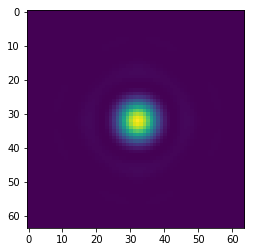

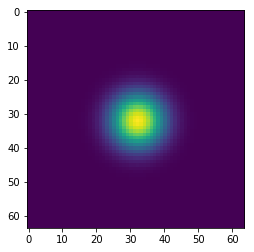

In [38]:
unaberrated_particle.plot()
aberrated_particle.plot()